# How to check if feature is legit

Based off https://www.kaggle.com/competitions/playground-series-s5e1/discussion/554349:

- plot graphs of sales over time

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import lightgbm as lgb
from sklearn.metrics import mean_absolute_percentage_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [51]:
DIRECTORY = '../data/'
train = pd.read_csv(DIRECTORY + 'train.csv', parse_dates=['date']).drop(columns='id')

In [65]:
def test_features(df: pd.DataFrame, feature):
    graphing = df.groupby(by=['date', feature], as_index=False)['num_sold'].mean().reset_index()
    graphing = graphing.merge(df.groupby(['date'])['num_sold'].mean().to_frame('date_mean'), on='date')
    graphing['num_sold'] = graphing['num_sold'] / graphing['date_mean']

    sns.lineplot(data=graphing, x='date', y='num_sold', hue=feature)

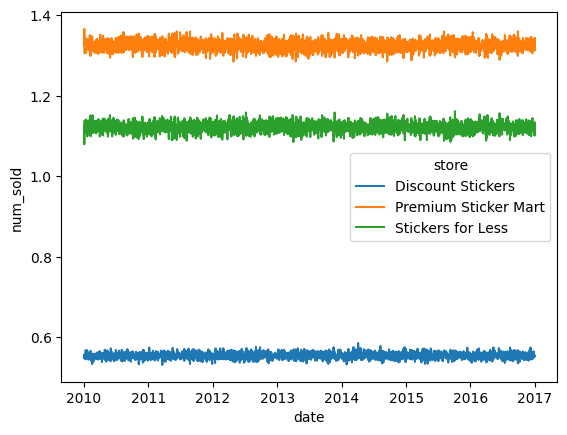

In [71]:
train['day_of_week'] = train['date'].dt.day_of_week
test_features(train[~train['country'].isin(['Canada', 'Kenya'])], 'store')